In [2]:
import numpy as np
import os
import glob
import json
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 특정 경로 설정 (예: 'data' 디렉토리)
directory_path = "JSON"

# 특정 경로 하위의 모든 JSON 파일 찾기
json_files = glob.glob(os.path.join(directory_path, '*.json'))

# 모든 JSON 파일의 데이터 불러오기
all_data = []

labels = []

for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        all_data.append(data)


for idx, fileName in enumerate(json_files):
    splited = fileName.replace("JSON\\", "").split("_")
    if splited[0] not in labels:
        labels.append(splited[0])

All_class_data_list = [[] for _ in range(len(labels))]
y = []

# 불러온 데이터 출력 (또는 다른 처리)
for idx, data in enumerate(all_data):
    print(f"Data from {json_files[idx]}: {data}")
    for j in range(len(labels)):
        if labels[j] in json_files[idx]:
            for d in data:
                All_class_data_list[j].append(d['feature'])
                y.append(j)

print(y)


Data from JSON\BIBI_BadGirl_MFCC_feature.json: [{'time': [10, 20], 'feature': [-107.15461730957031, 11.849685668945312, -33.083560943603516, -13.7149658203125, -24.1431827545166, 0.3267887234687805, -25.66385269165039, -3.9144158363342285, -4.730465412139893, -20.675073623657227, -13.538280487060547, -15.4901704788208, -13.787870407104492, -15.056300163269043, -8.650799751281738, -12.115193367004395, -9.142374992370605, -4.930410385131836, -12.636883735656738, -12.865433692932129]}, {'time': [20, 30], 'feature': [-110.9509048461914, -5.482512950897217, -25.142314910888672, -12.167976379394531, -18.283679962158203, -1.396714448928833, -22.3072452545166, -5.468383312225342, -8.159402847290039, -21.06690788269043, -13.327363967895508, -14.313701629638672, -14.10933780670166, -7.26876974105835, -3.555997610092163, -4.528212070465088, -5.020134925842285, -5.096775531768799, -10.575303077697754, -6.752892017364502]}, {'time': [42, 52], 'feature': [-150.3567352294922, -9.704010963439941, -49.

In [4]:
x=[]

for i in range(len(All_class_data_list)):
    for j in range(len(All_class_data_list[i])):
        x.append(All_class_data_list[i][j])

In [5]:
x = np.array(x)

print(x.shape)

(327, 20)


In [6]:
print(len(y))
#확인용

327


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.96      1.00      0.98        22
           2       0.94      0.89      0.91        18
           3       0.93      0.93      0.93        15

    accuracy                           0.95        66
   macro avg       0.96      0.96      0.96        66
weighted avg       0.95      0.95      0.95        66



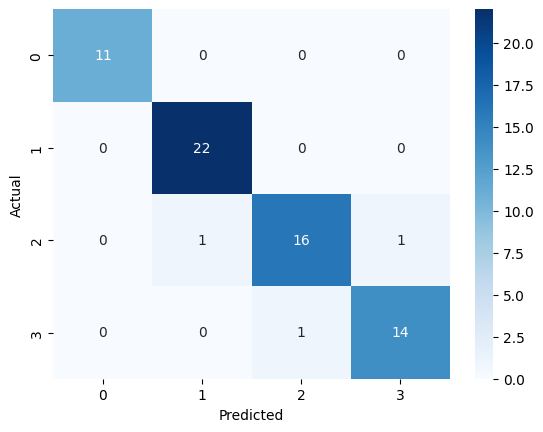

In [9]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
scores = cross_val_score(model, x, y, cv=15)
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean()}')

Cross-Validation Accuracy Scores: [1.         1.         0.95454545 0.86363636 0.90909091 0.95454545
 0.95454545 1.         0.95454545 1.         0.72727273 0.86363636
 1.         0.95238095 0.80952381]
Mean Cross-Validation Accuracy: 0.9295815295815296


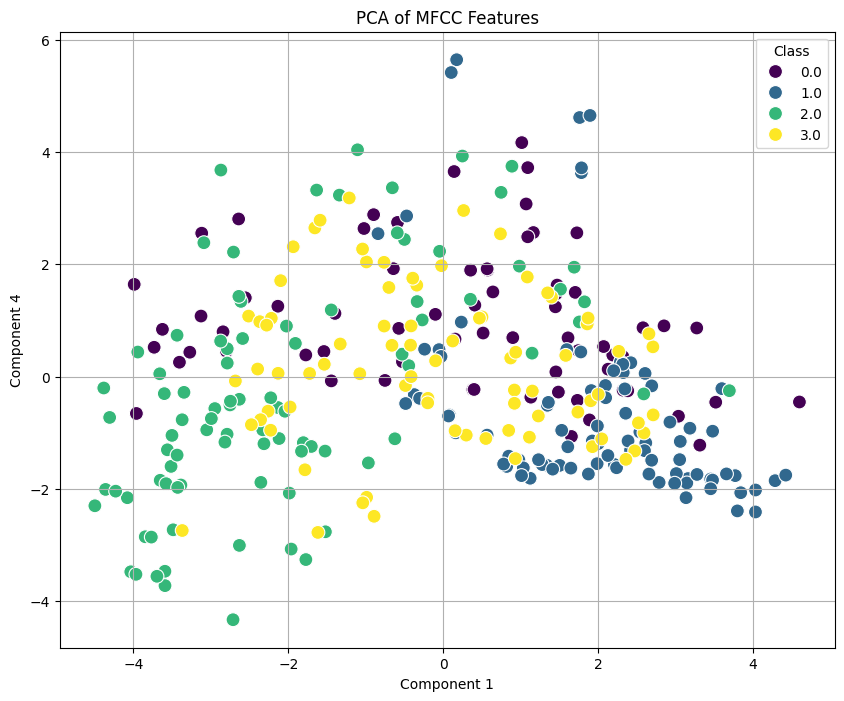

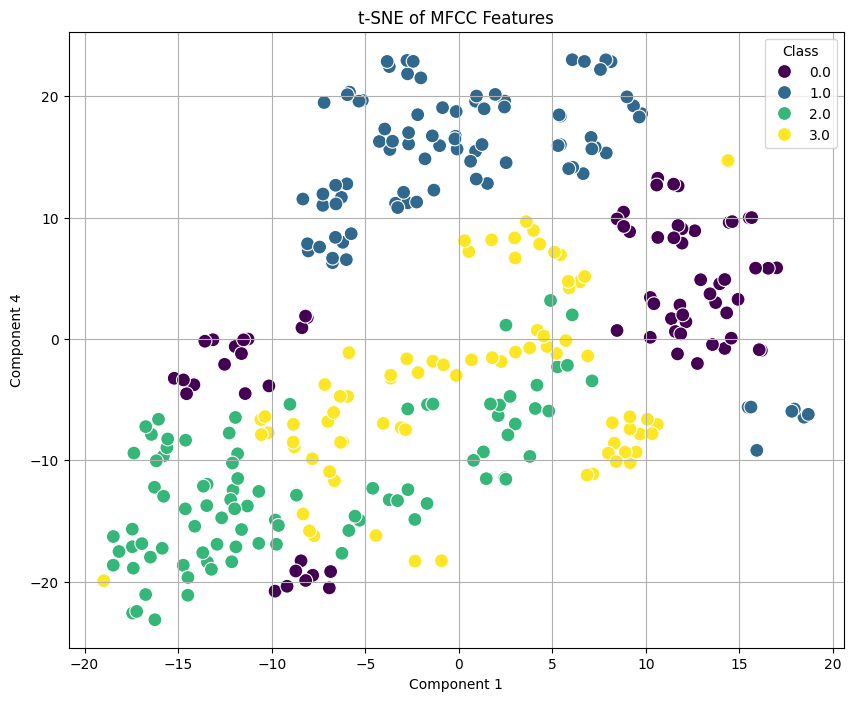

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 데이터 예제 (각 클래스별로 20개의 특징을 갖는 MFCC 데이터)
# 실제 데이터로 대체하세요
np.random.seed(42)
class_1 = np.array(All_class_data_list[0])
class_2 = np.array(All_class_data_list[1])
class_3 = np.array(All_class_data_list[2])
class_4 = np.array(All_class_data_list[3])

# 레이블 생성
labels_1 = np.zeros(class_1.shape[0])
labels_2 = np.ones(class_2.shape[0])
labels_3 = np.array([2]*class_3.shape[0])
labels_4 = np.array([3]*class_4.shape[0])

# 데이터 합치기
X = np.vstack((class_1, class_2, class_3, class_4))
y = np.hstack((labels_1, labels_2, labels_3, labels_4))

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE 차원 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 시각화 함수
def plot_embedding(X, y, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.ylabel('Component 3')
    plt.ylabel('Component 4')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

# PCA 시각화
plot_embedding(X_pca, y, 'PCA of MFCC Features')

# t-SNE 시각화
plot_embedding(X_tsne, y, 't-SNE of MFCC Features')


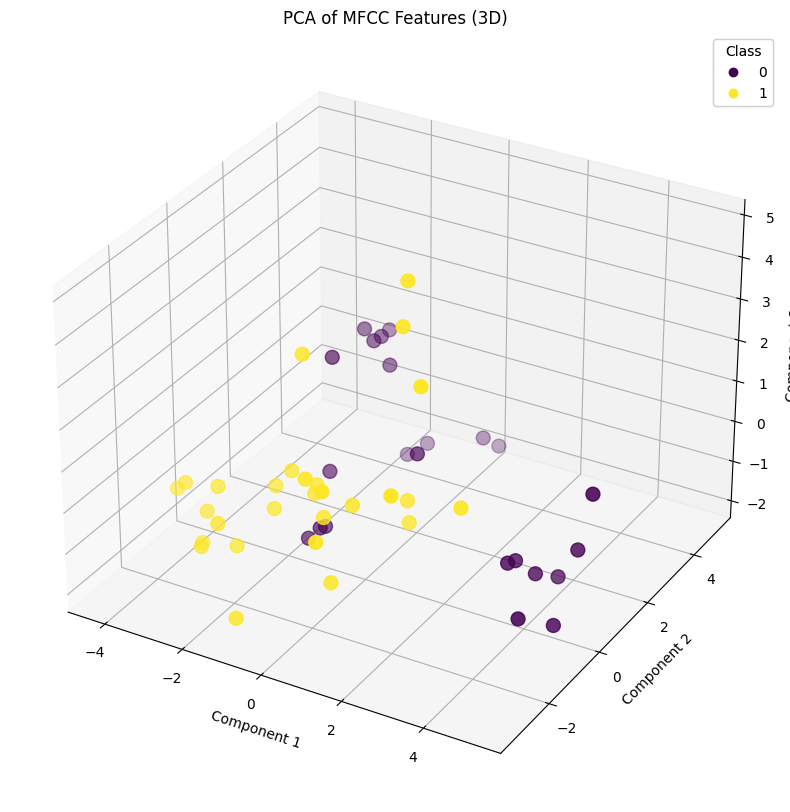

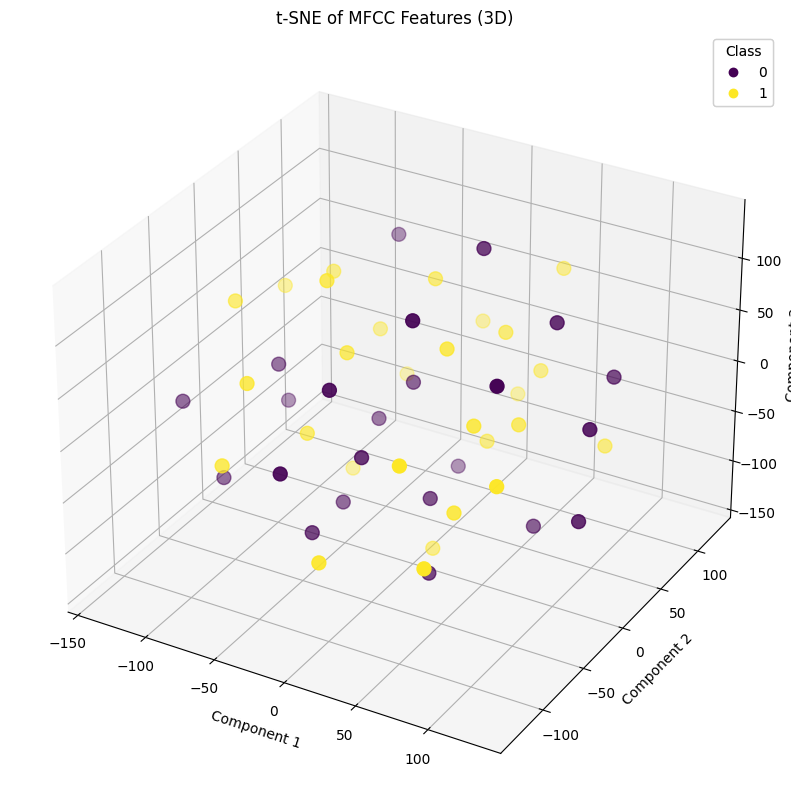

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 데이터 예제 (각 클래스별로 20개의 특징을 갖는 MFCC 데이터)
# 실제 데이터로 대체하세요
np.random.seed(42)
class_1 = np.array(All_class_data_list[0])
class_2 = np.array(All_class_data_list[1])

# 레이블 생성
labels_1 = np.zeros(class_1.shape[0])
labels_2 = np.ones(class_2.shape[0])

# 데이터 합치기
X = np.vstack((class_1, class_2))
y = np.hstack((labels_1, labels_2))

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 차원 축소
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# t-SNE 차원 축소
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 3D 시각화 함수
def plot_3d_embedding(X, y, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=100)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    legend1 = ax.legend(*scatter.legend_elements(), title="Class")
    ax.add_artist(legend1)
    plt.show()

# PCA 시각화
plot_3d_embedding(X_pca, y, 'PCA of MFCC Features (3D)')

# t-SNE 시각화
plot_3d_embedding(X_tsne, y, 't-SNE of MFCC Features (3D)')


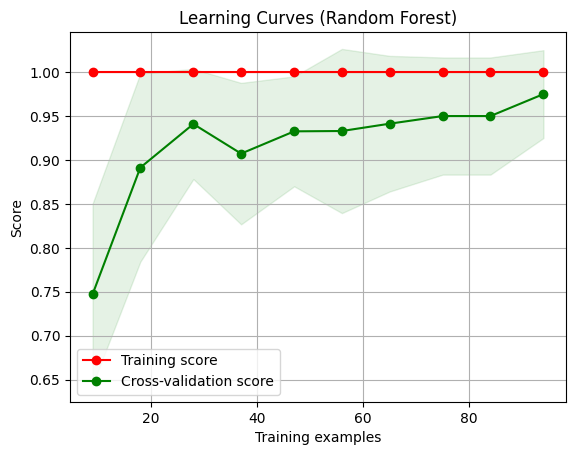

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# 훈련 데이터와 검증 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 생성
model = RandomForestClassifier(random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# 학습 곡선 평균과 표준편차 계산
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 학습 곡선 그리기
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# 훈련 점수 그리기
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# 검증 점수 그리기
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
